The notebook uses the Logistic Regression model from the scikit-learn library. The dataset used for the classification task is the red wine quality data. This tutorial provides a basic implementation of the Logistic Regression model in Python, which can be extended for further learning.

You can download the dataset from [here](https://doi.org/10.24432/C56S3T).

**Import dependencies**

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing 
import seaborn as sns # data visualization
from sklearn.linear_model import LogisticRegression #LR model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

**Data**

In [15]:
#load  data into dataframe
import pandas as pd

wine = pd.read_csv('/kaggle/input/winequality-red/winequality-red.csv', sep=';')


In [16]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [23]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Data PreProcessing**

In [17]:
# Setting the wine quality between 1 and 0. If wine quality is >= 7, it is considered good (1), otherwise not good (0).
wine['good_quality'] = [1 if x >= 7 else 0 for x in wine['quality']]

# Display a sample of 10 rows from the dataset
wine.sample(10)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1115            7.0             0.690         0.07            2.50      0.091   
1472            7.6             0.350         0.60            2.60      0.073   
1498            6.6             0.895         0.04            2.30      0.068   
702             7.0             0.640         0.02            2.10      0.067   
822             6.7             0.540         0.13            2.00      0.076   
932             7.6             0.400         0.29            1.90      0.078   
881             7.6             0.715         0.00            2.10      0.068   
892            10.1             0.450         0.23            1.90      0.082   
1002            9.1             0.290         0.33            2.05      0.063   
77              6.8             0.785         0.00            2.40      0.104   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1115                 15.0                  21.0  0.99572  3.38       0.60   
1472                 23.0                  44.0  0.99656  3.38       0.79   
1498                  7.0                  13.0  0.99582  3.53       0.58   
702                   9.0                  23.0  0.99700  3.47       0.67   
822                  15.0                  36.0  0.99730  3.61       0.64   
932                  29.0                  66.0  0.99710  3.45       0.59   
881                  30.0                  35.0  0.99533  3.48       0.65   
892                  10.0                  18.0  0.99774  3.22       0.65   
1002                 13.0                  27.0  0.99516  3.26       0.84   
77                   14.0                  30.0  0.99660  3.52       0.55   

      alcohol  quality  good_quality  
1115     11.3        6             0  
1472     11.1        6             0  
1498     10.8        6             0  
702       9.4        6             0  
822       9.8        5             0  
932       9.5        6             0  
881      11.4        6             0  
892       9.3        6             0  
1002     11.7        7             1  
77       10.7        6             0

**Data Analysis and Visualization**

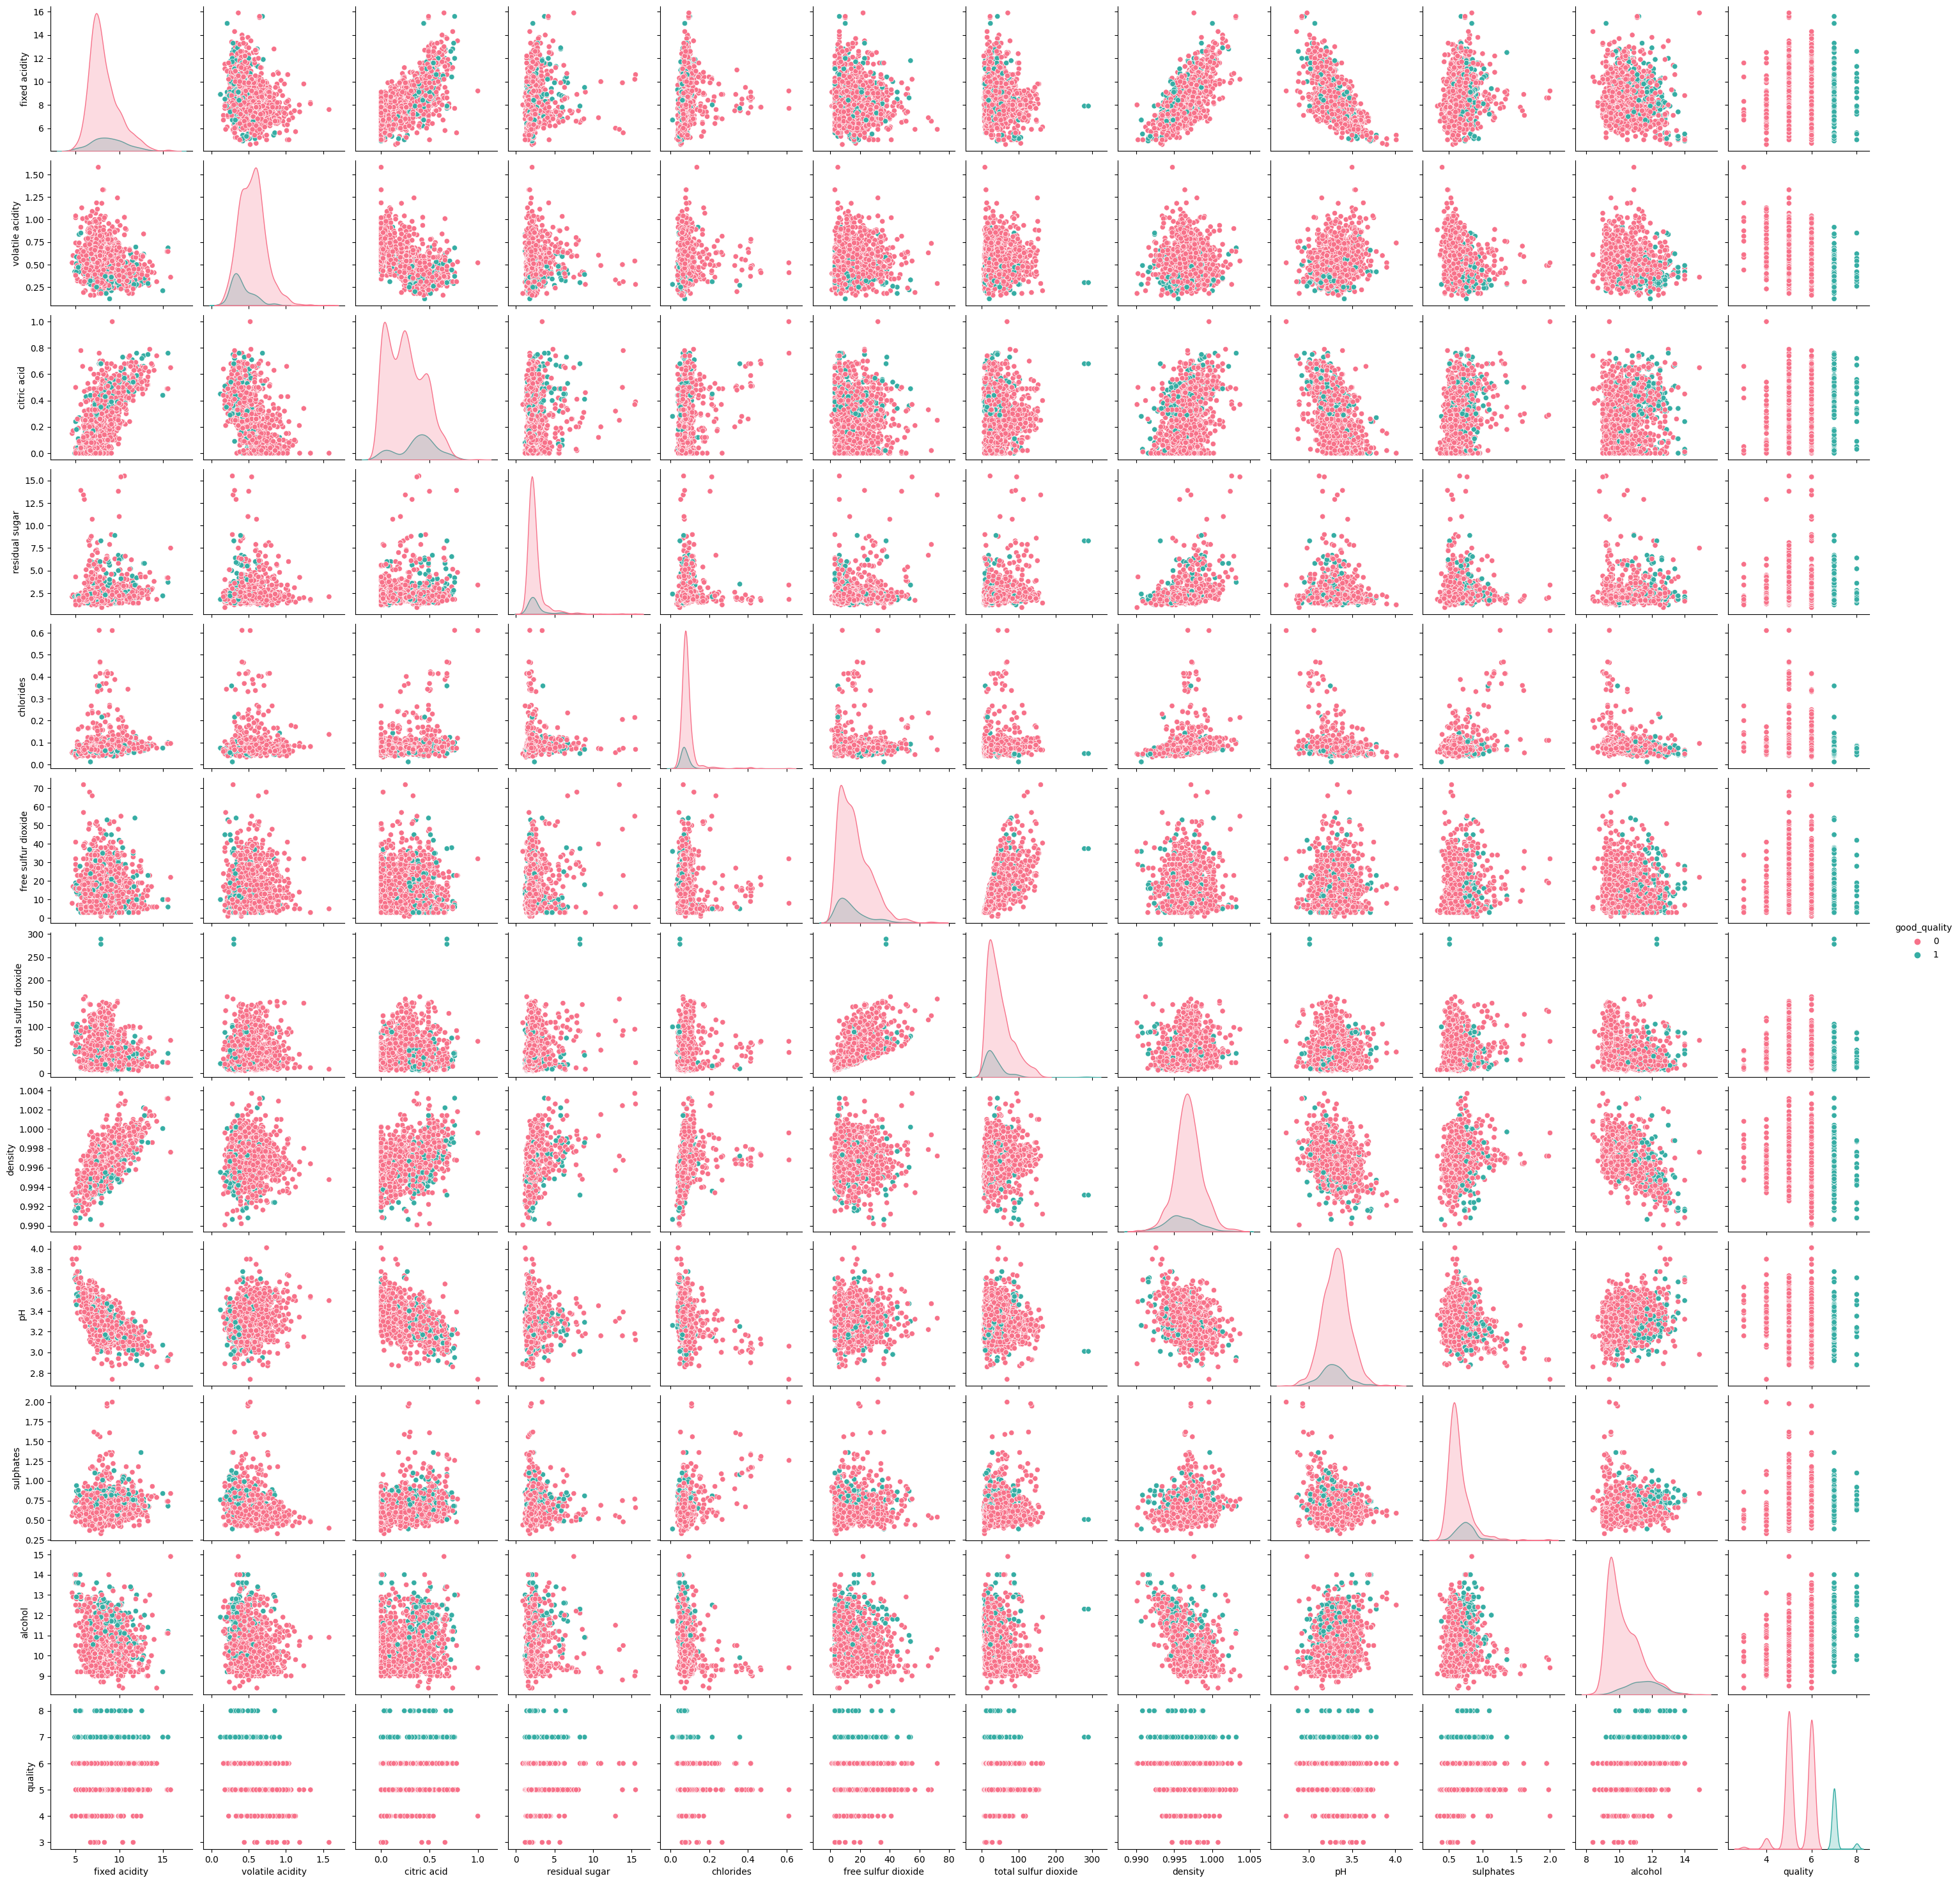

In [25]:
import seaborn as sns

# Plot pairwise relationships with hue based on good quality
sns.pairplot(wine, hue="good_quality", palette="husl")


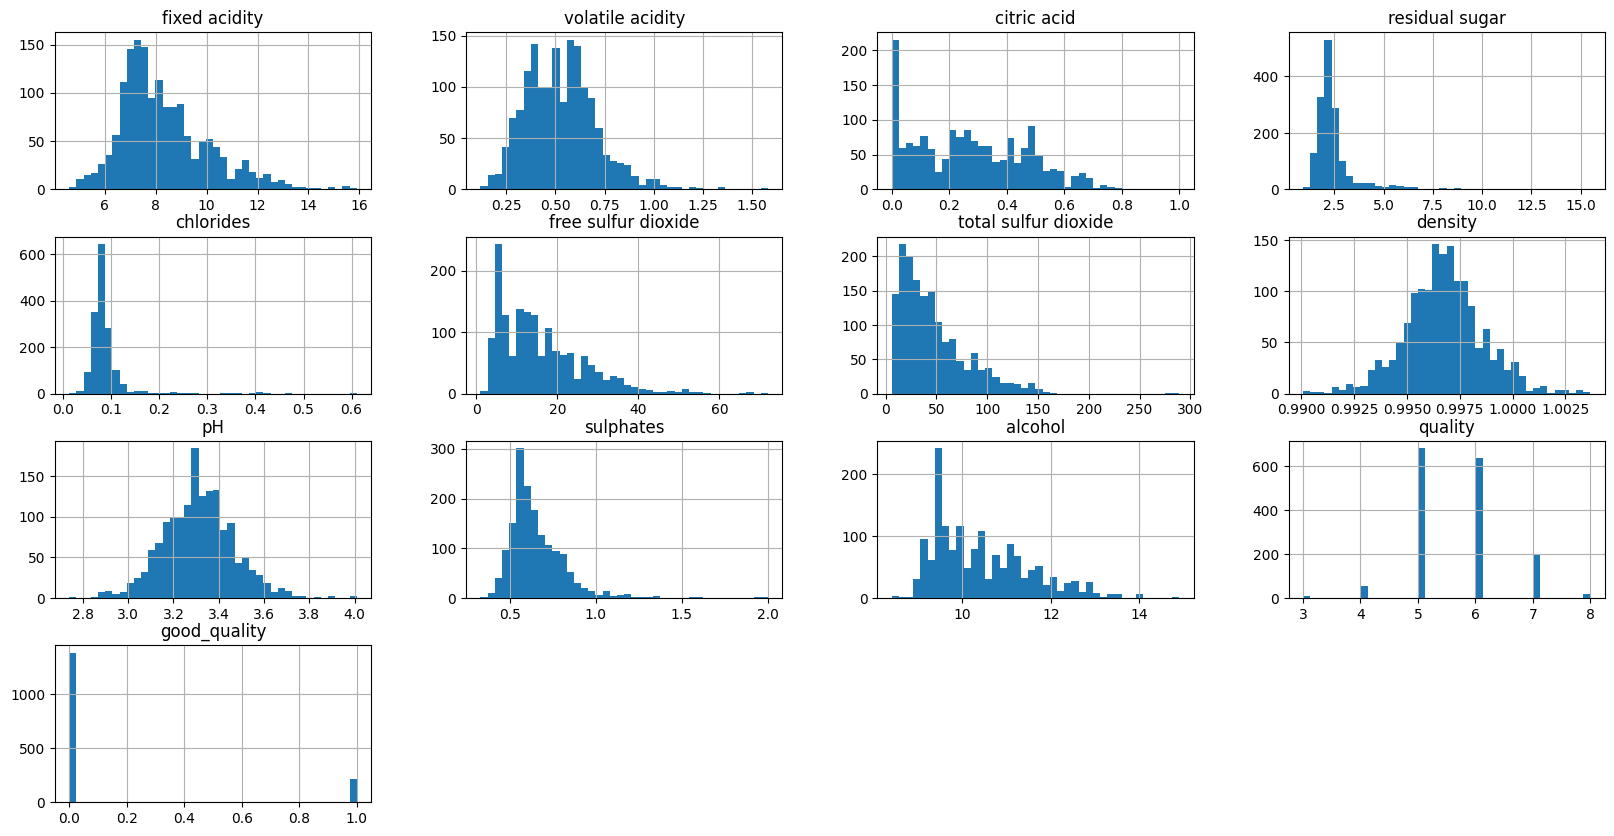

In [26]:
import matplotlib.pyplot as plt

# Plot histograms of the wine dataset with 40 bins
wine.hist(bins=40, figsize=(20, 10))
plt.show()


In [27]:
wine.groupby('good_quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
good_quality                                                                 
0                  8.236831          0.547022     0.254407        2.512120   
1                  8.847005          0.405530     0.376498        2.708756   

              chlorides  free sulfur dioxide  total sulfur dioxide   density  \
good_quality                                                                   
0              0.089281            16.172214             48.285818  0.996859   
1              0.075912            13.981567             34.889401  0.996030   

                    pH  sulphates    alcohol   quality  
good_quality                                            
0             3.314616   0.644754  10.251037  5.408828  
1             3.288802   0.743456  11.518049  7.082949

**Prepare data for training**

In [18]:
# Create a copy of the wine DataFrame
X = wine.copy()

# Define the target variable y
y = X['good_quality']

# Drop the 'quality' and 'good_quality' columns from X
X = X.drop(['quality', 'good_quality'], axis=1)


In [29]:
#total number of good wines
y.value_counts()

good_quality
0    1382
1     217
Name: count, dtype: int64

In [19]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)


**Logistic Regression model**

In [20]:
# Initialize the Logistic Regression model with maximum iterations and verbosity
model = LogisticRegression(max_iter=2000, verbose=1)

# Fit the model with the training data
model.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = model.predict(X_test)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.75632D+02    |proj g|=  2.07850D+04

At iterate   50    f=  3.26999D+02    |proj g|=  2.19952D+00

At iterate  100    f=  3.24861D+02    |proj g|=  7.38596D+01

At iterate  150    f=  3.23366D+02    |proj g|=  3.59289D+00


 This problem is unconstrained.



At iterate  200    f=  3.22665D+02    |proj g|=  1.44555D+01

At iterate  250    f=  3.20297D+02    |proj g|=  1.71534D+00

At iterate  300    f=  3.19959D+02    |proj g|=  2.48579D+00

At iterate  350    f=  3.19870D+02    |proj g|=  2.87130D+00

At iterate  400    f=  3.19845D+02    |proj g|=  1.16378D+00

At iterate  450    f=  3.19818D+02    |proj g|=  1.85093D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12    496    576      1     0     0   4.898D-02   3.198D+02
  F =   319.81152696666749     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print the precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate and print the recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate and print the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


Accuracy: 0.8791666666666667
Precision: 0.5757575757575758
Recall: 0.30158730158730157
F1 Score: 0.39583333333333337


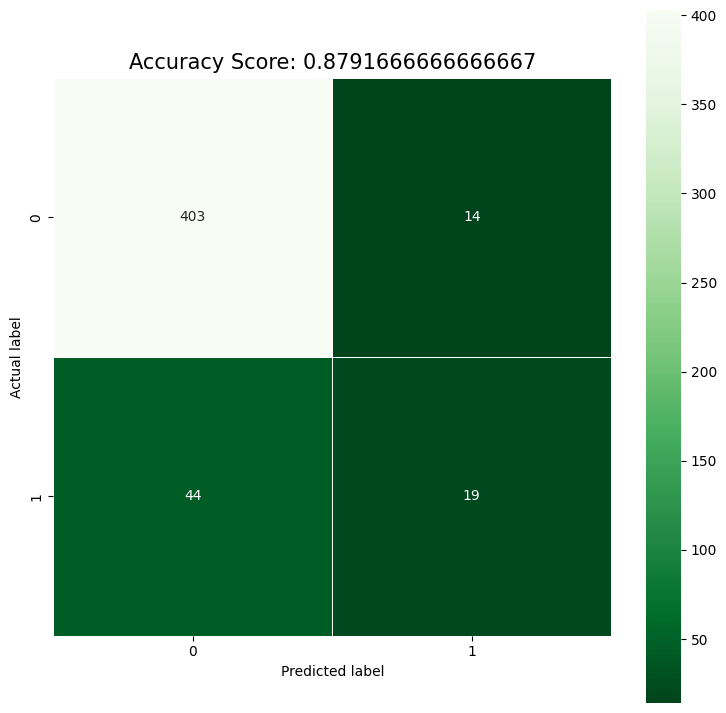

In [9]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Greens_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Add the accuracy score to the title
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size=15)

# Show the plot
plt.show()


**Optimizing**

reomving otulizers

In [23]:
import plotly.graph_objs as go
import plotly.offline as py

In [25]:


def OutliersBox(df, feature_name):
    # Create a Box plot for all points
    trace0 = go.Box(y=df[feature_name], name='All Points', jitter=0.3, pointpos=-1.8, boxpoints='all')

    # Create a Box plot for suspected outliers
    trace1 = go.Box(y=df[feature_name], name='Suspected Outliers', boxpoints='suspectedoutliers')

    # Define the layout for the plot
    layout = go.Layout(title="{} Outliers".format(feature_name))

    # Combine the traces into a list
    data = [trace0, trace1]

    # Create a Figure object
    fig = go.Figure(data=data, layout=layout)

    # Plot the figure
    py.iplot(fig, filename="Outliers")

# Example usage (make sure to replace `your_dataframe` and `your_feature` with actual dataframe and feature names)
# OutliersBox(your_dataframe, 'your_feature')


In [27]:
OutliersBox(wine, wine.columns[0])

In [28]:
def TukeyOutliers(data, feature_name, drop=False):
    data_array = data[feature_name]
    Q1 = np.percentile(data_array, 25)
    Q3 = np.percentile(data_array, 75)
#   step = 1.5*(Q3-Q1)  # Standard scale
    step = 3.0*(Q3-Q1)
    
    outlier_indices = data_array[~((data_array>=Q1-step)&(data_array<=Q3+step))].index.tolist()
    outlier_values = data_array[~((data_array>=Q1-step)&(data_array<=Q3+step))].values
    
    print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outlier_indices), outlier_values))
    
    if drop:
        good_data = data.drop(data.index[outlier_indices]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))     
        return good_data
               
    else: 
        print ("Nothing happens, df.shape = ",data.shape)
        return data

In [29]:
wine_clean = TukeyOutliers(wine,wine.columns[0],drop=True)
OutliersBox(wine_clean, wine.columns[0])

wine_clean = TukeyOutliers(wine_clean,wine.columns[1],drop=True)
OutliersBox(wine_clean, wine.columns[1])

wine_clean = TukeyOutliers(wine_clean,wine.columns[2],drop=True)
OutliersBox(wine_clean, wine.columns[2])

wine_clean = TukeyOutliers(wine_clean,wine.columns[3],drop=True)
OutliersBox(wine_clean, wine.columns[3])

wine_clean = TukeyOutliers(wine_clean,wine.columns[4],drop=True)
OutliersBox(wine_clean, wine.columns[4])

wine_clean = TukeyOutliers(wine_clean,wine.columns[5],drop=True)
OutliersBox(wine_clean, wine.columns[5])

wine_clean = TukeyOutliers(wine_clean,wine.columns[6],drop=True)
OutliersBox(wine_clean, wine.columns[6])

wine_clean = TukeyOutliers(wine_clean,wine.columns[7],drop=True)
OutliersBox(wine_clean, wine.columns[7])

wine_clean = TukeyOutliers(wine_clean,wine.columns[8],drop=True)
OutliersBox(wine_clean, wine.columns[8])

wine_clean = TukeyOutliers(wine_clean,wine.columns[9],drop=True)
OutliersBox(wine_clean, wine.columns[9])

wine_clean = TukeyOutliers(wine_clean,wine.columns[10],drop=True)
OutliersBox(wine_clean, wine.columns[10])

Number of outliers (inc duplicates): 5 and outliers: [15.6 15.5 15.5 15.6 15.9]
New dataset with removed outliers has 1594 samples with 13 features each.


Number of outliers (inc duplicates): 1 and outliers: [1.58]
New dataset with removed outliers has 1593 samples with 13 features each.


Number of outliers (inc duplicates): 0 and outliers: []
New dataset with removed outliers has 1593 samples with 13 features each.


Number of outliers (inc duplicates): 87 and outliers: [ 6.1   6.1  10.7   5.5   5.9   5.9   5.1   5.5   5.5   5.5   5.5   7.3
  7.2   5.6   7.    6.4   5.6   5.6  11.   11.    4.8   5.8   5.8   6.2
  7.9   7.9   6.7   6.6   5.2  15.5   8.3   6.55  6.55  6.1   5.8   5.15
  6.3   7.9   5.1   5.6   5.6   6.    8.6   6.    6.6   6.    6.    9.
  8.8   8.8   5.    5.9   6.2   8.9   8.1   8.1   6.4   6.4   8.3   8.3
  5.5   5.5   5.5   6.2   5.6   7.8   5.8  12.9  13.4   4.8   6.3   5.4
  6.1   5.1   5.1  15.4  15.4   4.8   5.2   5.2  13.8  13.8   5.7   6.7
 13.9   5.1   7.8 ]
New dataset with removed outliers has 1506 samples with 13 features each.


Number of outliers (inc duplicates): 61 and outliers: [0.176 0.17  0.368 0.341 0.172 0.332 0.464 0.401 0.467 0.178 0.236 0.61
 0.36  0.27  0.337 0.263 0.611 0.358 0.343 0.186 0.213 0.214 0.159 0.174
 0.413 0.152 0.152 0.2   0.171 0.226 0.226 0.25  0.222 0.157 0.422 0.387
 0.415 0.157 0.157 0.243 0.241 0.19  0.165 0.194 0.161 0.414 0.216 0.171
 0.178 0.369 0.166 0.166 0.403 0.414 0.166 0.415 0.153 0.415 0.267 0.169
 0.23 ]
New dataset with removed outliers has 1445 samples with 13 features each.


Number of outliers (inc duplicates): 0 and outliers: []
New dataset with removed outliers has 1445 samples with 13 features each.


Number of outliers (inc duplicates): 0 and outliers: []
New dataset with removed outliers has 1445 samples with 13 features each.


Number of outliers (inc duplicates): 0 and outliers: []
New dataset with removed outliers has 1445 samples with 13 features each.


Number of outliers (inc duplicates): 2 and outliers: [4.01 4.01]
New dataset with removed outliers has 1443 samples with 13 features each.


Number of outliers (inc duplicates): 8 and outliers: [1.56 1.95 1.95 1.98 1.36 1.36 1.36 1.62]
New dataset with removed outliers has 1435 samples with 13 features each.


Number of outliers (inc duplicates): 0 and outliers: []
New dataset with removed outliers has 1435 samples with 13 features each.


In [30]:
X = wine_clean.copy()
y = X['good_quality'] 
X = X.drop(['quality','good_quality'], axis =1 )

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)#changing max iter vlaue to avoid error
# fitting the model with data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [33]:
# see the classification results
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.888631090487239

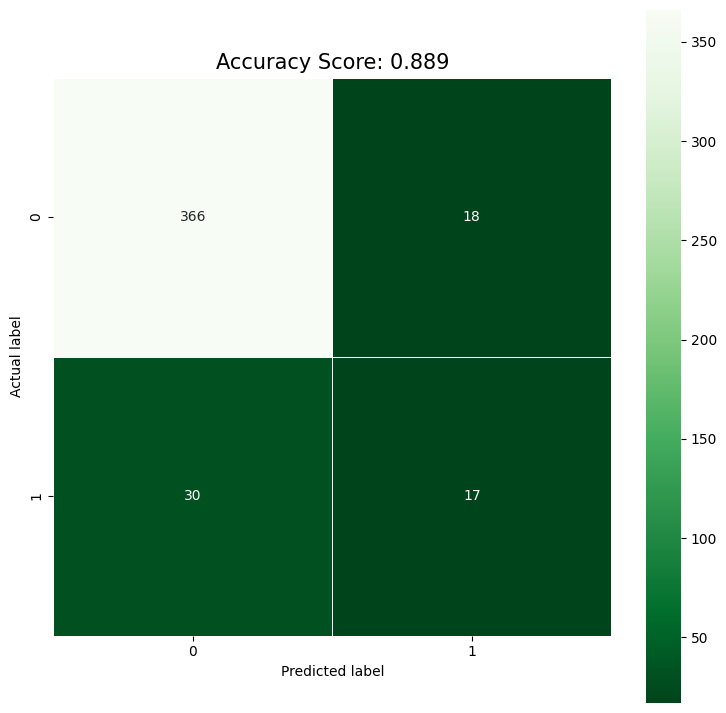

In [34]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Calculate the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Greens_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Add the accuracy score to the title
all_sample_title = 'Accuracy Score: {0:.3f}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size=15)

# Show the plot
plt.show()


Data Normalization

In [35]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialize the MinMaxScaler
scaler_minmax = MinMaxScaler()

# Fit the scaler to the data and transform it
X_norm = scaler_minmax.fit_transform(X)

# Convert the transformed data back to a DataFrame
X_norm = pd.DataFrame(X_norm, columns=X.columns)

# Display the first few rows of the normalized data (optional)
print(X_norm.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.269231          0.479339     0.000000        0.263158   0.474074   
1       0.307692          0.628099     0.000000        0.447368   0.637037   
2       0.307692          0.528926     0.052632        0.368421   0.592593   
3       0.634615          0.132231     0.736842        0.263158   0.466667   
4       0.269231          0.479339     0.000000        0.263158   0.474074   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.178571              0.176101  0.642560  0.625000   0.258427   
1             0.428571              0.383648  0.559435  0.326923   0.393258   
2             0.250000              0.301887  0.576060  0.384615   0.359551   
3             0.285714              0.339623  0.659185  0.288462   0.280899   
4             0.178571              0.176101  0.642560  0.625000   0.258427   

    alcohol  
0  0.178571  
1  0.250000  
2  0.250000  


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=7)

In [37]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with maximum iterations set to 2000
model = LogisticRegression(max_iter=2000)

# Fit the model with the training data
model.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = model.predict(X_test)


In [38]:
# see the classification results
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9071925754060325

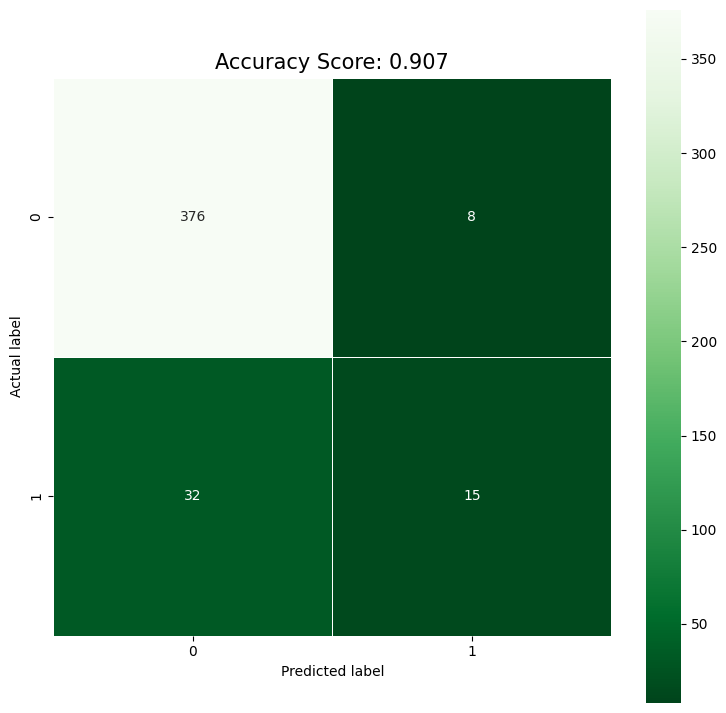

In [40]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Calculate the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Greens_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Add the accuracy score to the title
all_sample_title = 'Accuracy Score: {0:.3f}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size=15)

# Show the plot
plt.show()


Feature selection

                 Feature  Importance
10               alcohol    0.249782
9              sulphates    0.132450
6   total sulfur dioxide    0.101413
1       volatile acidity    0.089203
2            citric acid    0.071870
5    free sulfur dioxide    0.071759
8                     pH    0.067630
4              chlorides    0.066828
0          fixed acidity    0.061934
3         residual sugar    0.061583
7                density    0.025548


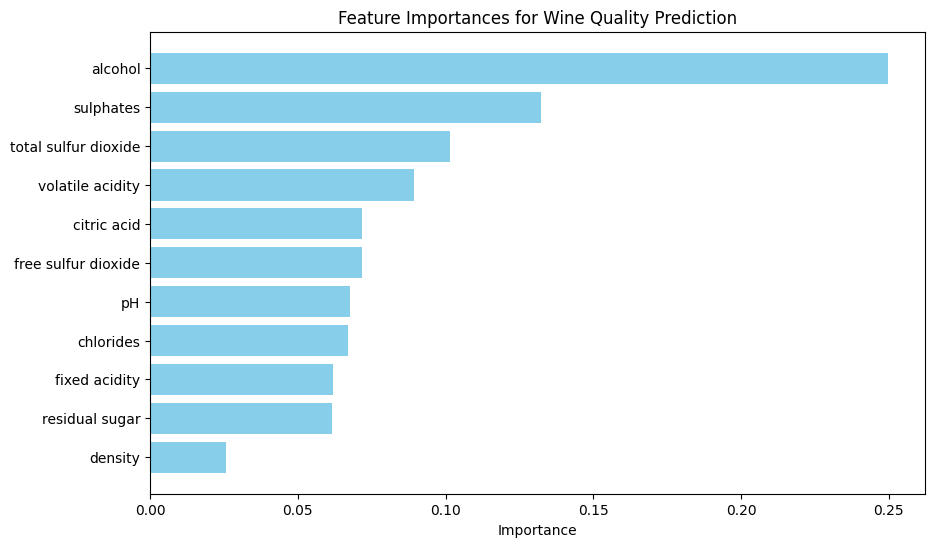

In [41]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier
classifier = DecisionTreeClassifier()

# Fit the classifier to the normalized data and target labels
classifier.fit(X_norm, y)

# Get the feature importances
feature_importances = classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances for Wine Quality Prediction')
plt.gca().invert_yaxis()
plt.show()


In [43]:
# Drop the 'density' column from the normalized dataset
X_1 = X_norm.drop(['density'], axis=1)

# Display information about the new DataFrame after dropping 'density'
X_1.info()

# Display information about the original DataFrame
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1435 non-null   float64
 1   volatile acidity      1435 non-null   float64
 2   citric acid           1435 non-null   float64
 3   residual sugar        1435 non-null   float64
 4   chlorides             1435 non-null   float64
 5   free sulfur dioxide   1435 non-null   float64
 6   total sulfur dioxide  1435 non-null   float64
 7   pH                    1435 non-null   float64
 8   sulphates             1435 non-null   float64
 9   alcohol               1435 non-null   float64
dtypes: float64(10)
memory usage: 112.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         14

In [44]:
X_1_train, X_1_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=7)

In [45]:
model.fit(X_1_train, y_train)
y_pred = model.predict(X_1_test)

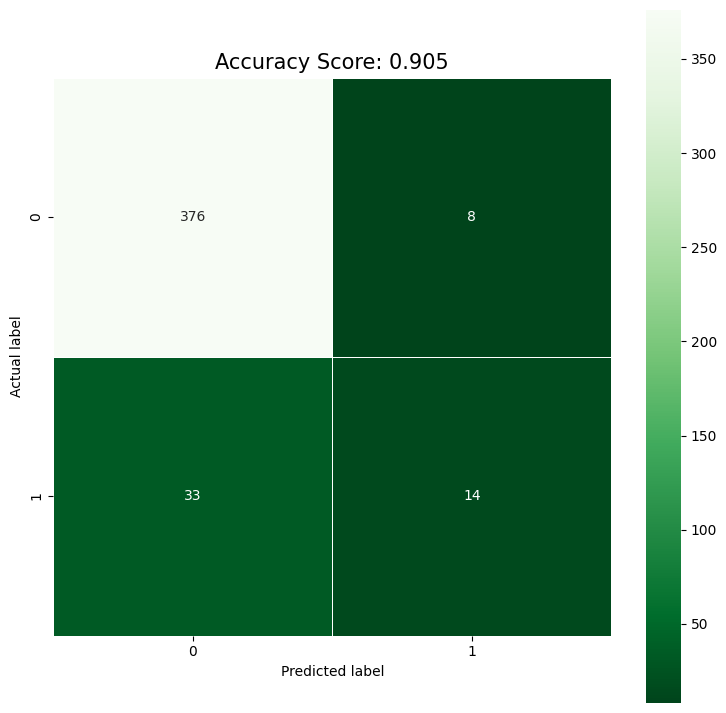

In [46]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Calculate the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Greens_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Add the accuracy score to the title
all_sample_title = 'Accuracy Score: {0:.3f}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size=15)

# Show the plot
plt.show()


Hyperparameter tuning

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [48]:
from sklearn.model_selection import RandomizedSearchCV

class RandomSearch(object):
    
    def __init__(self, X_train, y_train, model, hyperparameters):
        """
        Initialize the RandomSearch class with training data, model, and hyperparameters.

        Parameters:
        X_train (DataFrame): Training feature data
        y_train (Series or array-like): Training target data
        model (estimator): The machine learning model to be tuned
        hyperparameters (dict): The hyperparameters and their respective ranges to search
        """
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def perform_random_search(self):
        """
        Perform randomized search with 10-fold cross-validation and 100 iterations.

        Returns:
        best_model (estimator): The best model found during the search
        best_params_ (dict): The best hyperparameters found during the search
        """
        # Create randomized search with 10-fold cross-validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=7,
                                 n_iter=100,
                                 scoring='accuracy',
                                 cv=cv,
                                 verbose=1,
                                 n_jobs=-1)
        
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % message)

        return best_model, best_model.best_params_
    
    def best_model_predict(self, X_test):
        """
        Use the best model found during the random search to predict on test data.

        Parameters:
        X_test (DataFrame): Test feature data

        Returns:
        pred (array): Predictions for the test data
        """
        best_model, _ = self.perform_random_search()
        pred = best_model.predict(X_test)
        return pred


In [49]:
from scipy.stats import uniform

# Create regularization penalty space
penalty = ['l1', 'l2', 'none']

# Create regularization hyperparameter distribution using a uniform distribution
C = uniform(loc=0, scale=10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Example usage with LogisticRegression and RandomSearch class
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(solver='saga', max_iter=2000)  # 'saga' solver supports 'l1', 'l2', and 'none' penalties

# Initialize the RandomSearch class with training data, model, and hyperparameters
random_search = RandomSearch(X_train, y_train, model, hyperparameters)

# Perform random search and get the best model and parameters
best_model, best_params = random_search.perform_random_search()

# Use the best model to predict on the test data
y_pred = random_search.best_model_predict(X_test)

# Print the best parameters
print("Best hyperparameters found: ", best_params)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Best: 0.877485 using {'C': 3.703510829880352, 'penalty': 'l1'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Best: 0.877485 using {'C': 3.703510829880352, 'penalty': 'l1'}
Best hyperparameters found:  {'C': 3.703510829880352, 'penalty': 'l1'}


In [50]:
LR_RandSearch = RandomSearch(X_train, y_train, model, hyperparameters)
# LR_best_model, LR_best_params = LR_RandSearch.perform_random_search()
Prediction_LR = LR_RandSearch.best_model_predict(X_test)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Best: 0.877485 using {'C': 3.703510829880352, 'penalty': 'l1'}


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


In [51]:
# see the classification results
accuracy_score(y_test,Prediction_LR)

0.8932714617169374

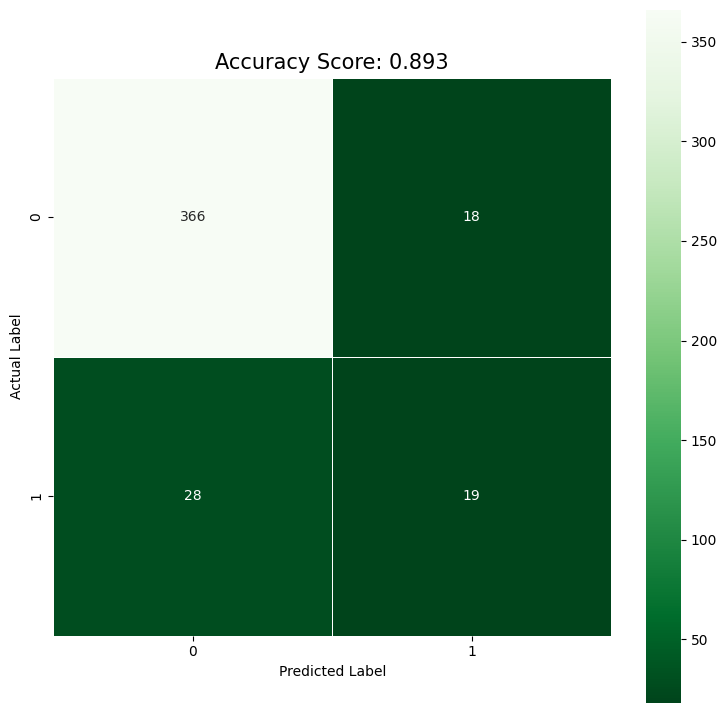

In [52]:
# Calculate the confusion matrix
cm = metrics.confusion_matrix(y_test, Prediction_LR)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Greens_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Add the accuracy score to the title
all_sample_title = 'Accuracy Score: {:.3f}'.format(accuracy_score(y_test, Prediction_LR))
plt.title(all_sample_title, size=15)

# Show the plot
plt.show()
